<a href="https://colab.research.google.com/github/TummalapentaTejtarun/Gemstone/blob/main/GEM_stones_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd

resized_dir = '/content/drive/MyDrive/data_sets/gemstones_resized_255'

# Create a list to store file paths and corresponding labels
data = []

# Iterate through the directories and subdirectories
for root, dirs, files in os.walk(resized_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
            # Extract label from directory name
            label = os.path.basename(root)
            # Create file path
            file_path = os.path.join(root, file)
            # Append file path and label to the list
            data.append((file_path, label))

# Create DataFrame from the list
df = pd.DataFrame(data, columns=['File_Path', 'Label'])

# Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

# Display the DataFrame
print(df.head())


                                           File_Path         Label
0  /content/drive/MyDrive/data_sets/gemstones_res...     Carnelian
1  /content/drive/MyDrive/data_sets/gemstones_res...       Bixbite
2  /content/drive/MyDrive/data_sets/gemstones_res...  Lapis Lazuli
3  /content/drive/MyDrive/data_sets/gemstones_res...        Sphene
4  /content/drive/MyDrive/data_sets/gemstones_res...      Cats Eye


In [ ]:
print(len(df))

9063


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the DataFrame into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Label'])

# Extracting file paths and labels for training and testing sets
X_train = train_df['File_Path'].tolist()
y_train = train_df['Label'].tolist()

X_test = test_df['File_Path'].tolist()
y_test = test_df['Label'].tolist()

# Displaying the shapes of the splits
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 7250
Testing set size: 1813


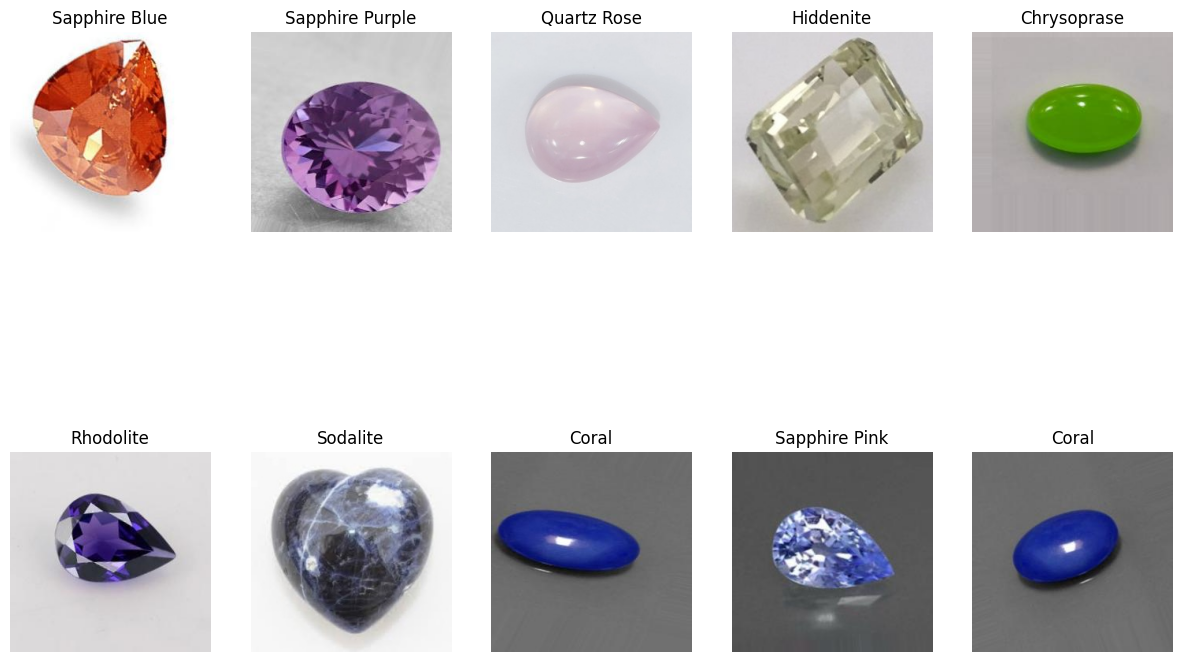

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define a function to display images and labels
def display_images(images, labels, num_images=10):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        index = random.randint(0, len(images) - 1)
        image = plt.imread(images[index])
        plt.imshow(image)
        plt.title(labels[index])
        plt.axis('off')
    plt.show()

# Display 10 random images along with their labels from the training set
display_images(X_train, y_train)


In [ ]:
# Calculate the number of samples for each class in the training set
train_class_counts = train_df['Label'].value_counts()

# Calculate the number of samples for each class in the testing set
test_class_counts = test_df['Label'].value_counts()

# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the number of samples for each class in the training set
print("Training Set Class Counts:")
print(train_class_counts)

# Display the number of samples for each class in the testing set
print("\nTesting Set Class Counts:")
print(test_class_counts)


Training Set Class Counts:
Label
Aventurine Green     84
Zoisite              84
Emerald              84
Quartz Beer          84
Beryl Golden         84
Alexandrite          84
Kyanite              84
Opal                 84
Tourmaline           84
Labradorite          84
Topaz                84
Amethyst             84
Jasper               84
Goshenite            84
Quartz Rose          84
Peridot              84
Bloodstone           84
Turquoise            84
Quartz Rutilated     84
Prehnite             84
Pyrite               84
Tigers Eye           84
Moonstone            84
Blue Lace Agate      84
Sapphire Blue        84
Aquamarine           84
Chrysoberyl          84
Rhodolite            84
Citrine              84
Tsavorite            83
Andradite            83
Grossular            83
Diamond              83
Chrysoprase          83
Dumortierite         83
Chrome Diopside      83
Morganite            83
Fluorite             83
Chrysocolla          83
Hessonite            83
Andalus

In [ ]:

!pip install opencv-python

In [ ]:
pip install --upgrade tensorflow keras


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
# Path to the train subfolder
train_folder_path ="/content/drive/MyDrive/data_sets/gemstones_resized_255/train"
target_num_images_per_class = 100

# Function to count the number of image files per class
def count_image_files_per_class(folder_path):
    image_files_per_class = {}
    # Iterate through each folder (class)
    for folder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, folder)
        if os.path.isdir(subfolder_path):
            # Count the number of image files in the folder
            num_image_files = len([f for f in os.listdir(subfolder_path) if f.endswith('.jpg') or f.endswith('.png')])
            # Store the count in the dictionary
            image_files_per_class[folder] = num_image_files
    return image_files_per_class

# Function to augment images until reaching the target number of images
def augment_images_until_target(class_folder_path, target_num_images):
    # Create an ImageDataGenerator for augmentation
    datagen = ImageDataGenerator(
        rotation_range=30,
        shear_range=0.1,
        zoom_range=0.3,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    # Load all images in the class folder
    image_list = [f for f in os.listdir(class_folder_path) if f.endswith('.jpg') or f.endswith('.png')]
    num_original_images = len(image_list)
    # If there are less than 100 images, augment images until reaching the target
    if num_original_images < target_num_images:
        num_augmented_images_needed = target_num_images - num_original_images
        # Load a sample image to get its shape
        sample_img_path = os.path.join(class_folder_path, image_list[0])
        sample_img = np.expand_dims(cv2.imread(sample_img_path), axis=0)
        # Augment images until reaching the target number
        for _ in range(num_augmented_images_needed):
            for batch in datagen.flow(sample_img, batch_size=1, save_to_dir=class_folder_path, save_prefix='aug', save_format='jpg'):
                break  # Only generate one augmented image per loop
        print(f"Generated {num_augmented_images_needed} augmented images for class {os.path.basename(class_folder_path)}")

# Step 1: Count the number of image files per class
image_files_per_class = count_image_files_per_class(train_folder_path)

# Step 2: Augment images until reaching the target number of images per class
for class_name, num_images in image_files_per_class.items():
    class_folder_path = os.path.join(train_folder_path, class_name)
    if num_images < target_num_images_per_class:
        augment_images_until_target(class_folder_path, target_num_images_per_class)

In [ ]:
import os

# Path to the train subfolder
train_folder_path = "/content/drive/MyDrive/data_sets/gemstones_resized_255/train"

# Function to count the number of image files per class
def count_image_files_per_class(folder_path):
    image_files_per_class = {}
    # Iterate through each folder (class)
    for folder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, folder)
        if os.path.isdir(subfolder_path):
            # Count the number of image files in the folder
            num_image_files = len([f for f in os.listdir(subfolder_path) if f.endswith('.jpg') or f.endswith('.png')])
            # Store the count in the dictionary
            image_files_per_class[folder] = num_image_files
    return image_files_per_class

# Count the number of image files per class
image_files_per_class = count_image_files_per_class(train_folder_path)

# Print the number of image files per class
print("Number of image files per class:")
for class_name, count in image_files_per_class.items():
    print(f"{class_name}: {count}")


Number of image files per class:
Topaz: 100
Variscite: 100
Tanzanite: 100
Turquoise: 100
Tsavorite: 100
Zircon: 100
Tigers Eye: 100
Zoisite: 100
Tourmaline: 100
Sunstone: 100
Spodumene: 100
Sapphire Yellow: 100
Sphene: 100
Serpentine: 100
Scapolite: 100
Sodalite: 100
Spessartite: 100
Spinel: 100
Sapphire Pink: 100
Sapphire Purple: 100
Sapphire Blue: 100
Quartz Rose: 100
Rhodolite: 100
Quartz Smoky: 100
Quartz Lemon: 100
Quartz Rutilated: 100
Rhodochrosite: 100
Rhodonite: 100
Quartz Beer: 100
Ruby: 100
Pyrope: 100
Moonstone: 100
Pyrite: 100
Opal: 100
Morganite: 100
Prehnite: 100
Pearl: 100
Onyx Black: 100
Peridot: 100
Onyx Red: 100
Onyx Green: 100
Malachite: 100
Iolite: 100
Jade: 100
Jasper: 100
Labradorite: 100
Kyanite: 100
Larimar: 100
Kunzite: 100
Lapis Lazuli: 100
Hiddenite: 100
Hessonite: 100
Grossular: 100
Diaspore: 100
Garnet Red: 100
Emerald: 100
Fluorite: 100
Diamond: 100
Dumortierite: 100
Goshenite: 100
Danburite: 100
Coral: 100
Citrine: 100
Chrysoprase: 100
Bloodstone: 100
Ca

In [ ]:
#CNN
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define image dimensions and batch size
img_height, img_width = 255, 255
batch_size = 32

# Create ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training and testing data
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='File_Path',
    y_col='Label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='File_Path',
    y_col='Label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Define the custom CNN model
model = Sequential()

# Add convolutional layers with max pooling and batch normalization
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

# Flatten the output and add fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(BatchNormalization())

# Output layer with softmax activation for multi-class classification
model.add(Dense(len(train_class_counts), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=9,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Evaluate the model
accuracy = model.evaluate(test_generator)[1]

print("Test Accuracy:", accuracy)


Found 7250 validated image filenames belonging to 87 classes.
Found 1813 validated image filenames belonging to 87 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/9


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


227/227 ━━━━━━━━━━━━━━━━━━━━ 2786s 12s/step - accuracy: 0.2039 - loss: 3.5718 - val_accuracy: 0.0259 - val_loss: 5.4711
Epoch 2/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 180us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/9


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


227/227 ━━━━━━━━━━━━━━━━━━━━ 142s 609ms/step - accuracy: 0.5646 - loss: 1.7337 - val_accuracy: 0.4539 - val_loss: 2.0012
Epoch 4/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 97us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 141s 601ms/step - accuracy: 0.6716 - loss: 1.3171 - val_accuracy: 0.7375 - val_loss: 1.0069
Epoch 6/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 99us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 140s 598ms/step - accuracy: 0.7053 - loss: 1.1094 - val_accuracy: 0.7579 - val_loss: 0.9472
Epoch 8/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 198s 594ms/step - accuracy: 0.7479 - loss: 0.9949 - val_accuracy: 0.7512 - val_loss: 0.9808
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.7285 - loss: 1.0499
Test Accuracy: 0.7512410283088684


In [ ]:
#VGG-19
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define image dimensions and batch size
img_height, img_width = 255, 255
batch_size = 32

# Create ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training and testing data
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='File_Path',
    y_col='Label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='File_Path',
    y_col='Label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained VGG19 model without top layer
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(len(train_class_counts), activation='softmax')(x)

# Create final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=9,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Evaluate the model
accuracy = model.evaluate(test_generator)[1]

print("Test Accuracy:", accuracy)


Found 7250 validated image filenames belonging to 87 classes.
Found 1813 validated image filenames belonging to 87 classes.
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/9


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


227/227 ━━━━━━━━━━━━━━━━━━━━ 210s 800ms/step - accuracy: 0.3254 - loss: 3.1948 - val_accuracy: 0.6900 - val_loss: 2.5901
Epoch 2/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 132us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/9


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


227/227 ━━━━━━━━━━━━━━━━━━━━ 207s 660ms/step - accuracy: 0.6992 - loss: 1.3484 - val_accuracy: 0.7694 - val_loss: 1.1331
Epoch 4/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 152s 651ms/step - accuracy: 0.7494 - loss: 1.0680 - val_accuracy: 0.7832 - val_loss: 0.9439
Epoch 6/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 84us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 153s 652ms/step - accuracy: 0.7688 - loss: 0.9482 - val_accuracy: 0.8020 - val_loss: 0.8373
Epoch 8/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 153s 659ms/step - accuracy: 0.7932 - loss: 0.8865 - val_accuracy: 0.7959 - val_loss: 0.9347
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - accuracy: 0.7869 - loss: 0.9826
Test Accuracy: 0.795918345451355


In [ ]:
#Xception
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define image dimensions and batch size
img_height, img_width = 255, 255
batch_size = 32

# Create ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training and testing data
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='File_Path',
    y_col='Label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='File_Path',
    y_col='Label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained Xception model without top layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(len(train_class_counts), activation='softmax')(x)

# Create final model
model2 = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model2.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=9,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Evaluate the model
accuracy = model2.evaluate(test_generator)[1]

print("Test Accuracy:", accuracy)


Found 7250 validated image filenames belonging to 87 classes.
Found 1813 validated image filenames belonging to 87 classes.
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/9


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


227/227 ━━━━━━━━━━━━━━━━━━━━ 186s 720ms/step - accuracy: 0.5089 - loss: 2.4148 - val_accuracy: 0.8086 - val_loss: 0.8406
Epoch 2/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/9


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


227/227 ━━━━━━━━━━━━━━━━━━━━ 145s 624ms/step - accuracy: 0.7797 - loss: 0.9211 - val_accuracy: 0.8274 - val_loss: 0.7029
Epoch 4/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 71us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 147s 631ms/step - accuracy: 0.8232 - loss: 0.6836 - val_accuracy: 0.8373 - val_loss: 0.6397
Epoch 6/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 111us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 202s 630ms/step - accuracy: 0.8525 - loss: 0.5633 - val_accuracy: 0.8461 - val_loss: 0.6658
Epoch 8/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/9
227/227 ━━━━━━━━━━━━━━━━━━━━ 201s 632ms/step - accuracy: 0.8685 - loss: 0.4899 - val_accuracy: 0.8522 - val_loss: 0.6022
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step - accuracy: 0.8489 - loss: 0.6246
Test Accuracy: 0.852178692817688


57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 203ms/step
Confusion Matrix:
[[0 0 0 ... 2 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 ...
 [0 1 0 ... 0 0 0]
 [0 2 0 ... 0 1 1]
 [2 0 0 ... 0 0 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        20
           5       0.05      0.05      0.05        21
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00        21
           8       0.05      0.05      0.05        21
           9       0.00      0.00      0.00        21
          10       0.00      0.00      0.00        21
          11       0.05      0.05      0.05        21
          12       0.00      0.00      0.00        20
          13       0.00      0.00      

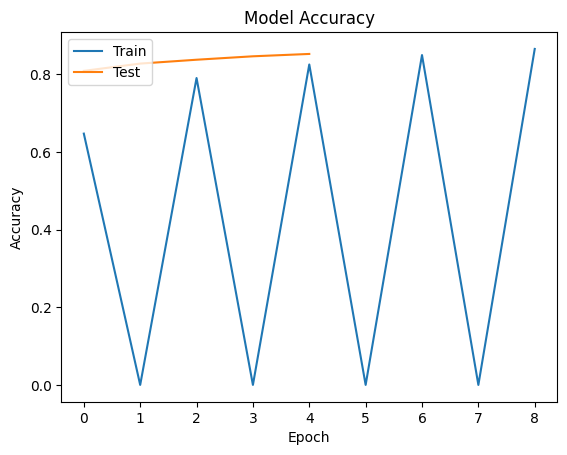

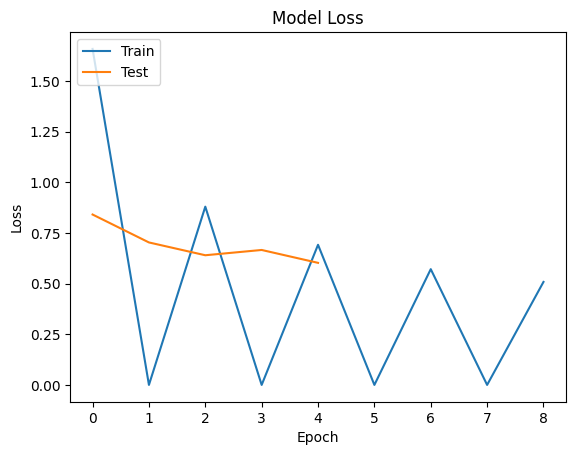

In [ ]:
#print confusion matrix,classification report, loss and visualize accuracy

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Predict classes for test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for test data
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
#print confusion matrix,classification report, loss and visualize accuracy

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Predict classes for test data
y_pred = model2.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for test data
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'model2' is not defined

In [ ]:
# prompt: just print 10 expected  and predicted images

import matplotlib.pyplot as plt
import numpy as np
# Predict classes for test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for test data
y_true = test_generator.classes

# Get class labels (assuming you have a way to map class indices to labels)
class_labels = list(test_generator.class_indices.keys())  # Replace with your actual class labels

# Print 10 expected and predicted images
num_images_to_print = 10
plt.figure(figsize=(15, 10))
for i in range(num_images_to_print):
    index = random.randint(0, len(y_true) - 1)
    plt.subplot(2, 5, i + 1)
    image_batch, _ = test_generator.next()  # Get a batch of images
    image = image_batch[0]  # Take the first image from the batch
    plt.imshow(image)
    true_label = class_labels[y_true[index]]
    predicted_label = class_labels[y_pred_classes[index]]
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')
plt.show()
